In [345]:
import numpy as np

In [346]:
import math

In [347]:
import matplotlib.pylab as plt

In [348]:
from struct import unpack

In [349]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [350]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [351]:
x,y= loadmnist('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')

In [428]:
print(x[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [353]:
print(y)

[5 0 4 ... 5 6 8]


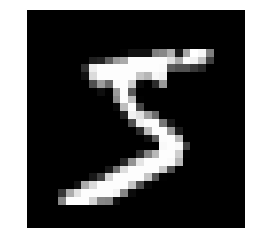

In [354]:
displaychar(x[0])

In [355]:
x.size

47040000

In [356]:
y.size

60000

In [357]:
x[0].size

784

In [358]:
y[0]

5

In [359]:
x_train = x[0:50000]

In [ ]:
y_train = y[0:50000]

In [ ]:
filterByClass(1);

In [361]:
x_train.size

39200000

In [362]:
y_train.size

50000

In [363]:
x_test = x[50000:60000]

In [364]:
y_test = y[50000:60000]

In [365]:
x_test.size

7840000

In [366]:
y_test.size

10000

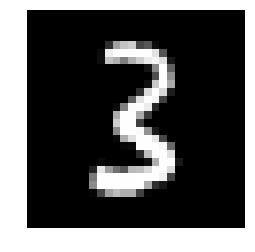

In [367]:
displaychar(x_test[0])

In [368]:
y_train.size

50000

In [369]:
type(x_train)

numpy.ndarray

In [370]:
type(y_train)

numpy.ndarray

In [371]:
x_train.size

39200000

In [372]:
mean = np.mean(x_train, axis = 0)

In [373]:
mean.size

784

In [374]:
cov = np.cov(np.transpose(x_train))

In [375]:
type(cov)

numpy.ndarray

In [376]:
cov.size

614656

In [379]:
c_0 = filterByClass(0)

In [378]:
c_0[0].size

784

In [334]:
math.log(0.09918)

-2.3108188979211493

In [380]:
mean_0 = np.mean(c_0, axis = 0)

In [381]:
mean_0.size

784

In [382]:
cov_0 = np.cov(np.transpose(c_0)) + 10 * np.identity(784)

In [383]:
cov_0.size

614656

In [384]:
from sklearn.naive_bayes import GaussianNB

In [385]:
gnb = GaussianNB()

In [386]:
gnb

GaussianNB(priors=None)

In [389]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None)

In [391]:
print(gnb.classes_)
print(gnb.class_count_)
print(gnb.class_prior_)
print(gnb.sigma_)

[0 1 2 3 4 5 6 7 8 9]
[4932. 5678. 4968. 5101. 4859. 4506. 4951. 5175. 4842. 4988.]
[0.09864 0.11356 0.09936 0.10202 0.09718 0.09012 0.09902 0.1035  0.09684
 0.09976]
[[1.29545218e-05 1.29545218e-05 1.29545218e-05 ... 1.29545218e-05
  1.29545218e-05 1.29545218e-05]
 [1.29545218e-05 1.29545218e-05 1.29545218e-05 ... 1.29545218e-05
  1.29545218e-05 1.29545218e-05]
 [1.29545218e-05 1.29545218e-05 1.29545218e-05 ... 1.29545218e-05
  1.29545218e-05 1.29545218e-05]
 ...
 [1.29545218e-05 1.29545218e-05 1.29545218e-05 ... 1.29545218e-05
  1.29545218e-05 1.29545218e-05]
 [1.29545218e-05 1.29545218e-05 1.29545218e-05 ... 1.29545218e-05
  1.29545218e-05 1.29545218e-05]
 [1.29545218e-05 1.29545218e-05 1.29545218e-05 ... 1.29545218e-05
  1.29545218e-05 1.29545218e-05]]


In [393]:
from scipy.stats import multivariate_normal

In [394]:
mv = multivariate_normal(mean=mean_0, cov=cov_0)

In [395]:
classes = [0,1,2,3,4,5,6,7,8,9]    

In [484]:
def predict(xt):
    amax = [];
    for c in range(len(classes)):
        prior_prob = gnb.class_prior_[c];
        x_c = filterByClass(c);
        mean_c = np.mean(x_c, axis = 0);
        cov_c = np.cov(np.transpose(x_c)) + (1000 * (np.identity(x_c[0].size)));
        post_prob = multivariate_normal.logpdf(xt, mean=mean_c, cov=cov_c)
        argmax = math.log(prior_prob) + post_prob;
        amax.append(argmax);
    return np.argmax(amax);

In [488]:
errors = [];
for i in range(2):
    if(y_test[i] != predict(x_test[i])):
        errors.append(i);
print("Errors " + str(len(errors)));

Errors 2


In [437]:
filterByClass(0).size/(784*50000)

0.09864